### Module 5: Data Manipulation

#### Case Study–1

#### 1. Find the highest-rated movie in the “Quest” story type.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("HollywoodMovies.csv")

# Filter for 'Quest' story type
quest_movies = df[df['Story'] == 'Quest']

# Find the highest-rated movie
highest_rated = quest_movies.loc[quest_movies['RottenTomatoes'].idxmax()]

# Display result
print("Highest-rated Quest movie:")
print("Movie:", highest_rated['Movie'])
print("Rating:", highest_rated['RottenTomatoes'])


Highest-rated Quest movie:
Movie: The Hurt Locker
Rating: 97.0


In [4]:
# 2. Find the genre in which there has been the greatest number of movie releases

# Group by Genre and count number of movies
genre_counts = df['Genre'].value_counts()

# Display the genre with the maximum releases
print("Genre with greatest number of releases:", genre_counts.idxmax())
print("Number of releases:", genre_counts.max())

Genre with greatest number of releases: Comedy
Number of releases: 177


In [5]:
# 3. Print the names of the top five movies with the costliest budgets.

# Sort movies by Budget in descending order
top5_budget = df.sort_values(by="Budget", ascending=False).head(5)

# Print the names of the top 5 movies
print("Top 5 Movies with the Costliest Budgets:")
for movie in top5_budget['Movie']:
    print(movie)


Top 5 Movies with the Costliest Budgets:
Pirates of the Caribbean: At World's End
Tangled
Spider-Man 3
John Carter
The Dark Knight Rises


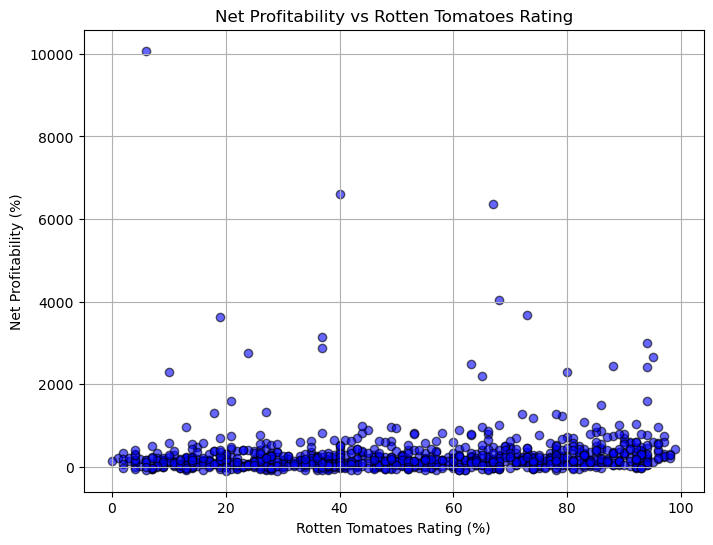

In [8]:
# 4. Is there any correspondence between the critics’ evaluation of a movie and its acceptance by the public? 
# Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.

import matplotlib.pyplot as plt

# --- Step 1: Calculate Net Profitability ---
df['NetProfitability'] = (df['WorldGross'] - df['Budget']) / df['Budget'] * 100

# --- Step 2: Scatter Plot ---
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(df['RottenTomatoes'], df['NetProfitability'],
            color='blue', alpha=0.6, edgecolor='black')

plt.title("Net Profitability vs Rotten Tomatoes Rating")
plt.xlabel("Rotten Tomatoes Rating (%)")
plt.ylabel("Net Profitability (%)")
plt.grid(True)
plt.show()


#### Perform Operations on Files
5.1: From the raw data below create a data frame
'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
'age': [42, 52, 36, 24, 73],
'preTestScore': [4, 24, 31, ".", "."],
'postTestScore': ["25,000", "94,000", 57, 62, 70]

In [10]:
import pandas as pd
import numpy as np

# Step 1: Raw data
data = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
    'age': [42, 52, 36, 24, 73],
    'preTestScore': [4, 24, 31, ".", "."],
    'postTestScore': ["25,000", "94,000", 57, 62, 70]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: Save to CSV
df.to_csv("example.csv", index=False)

# Step 4: Read with headers
print("DataFrame with headers:")
df_with_headers = pd.read_csv("example.csv")
df_with_headers

DataFrame with headers:


,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [12]:
# Step 6: Read without headers
print("\nDataFrame without headers:")
df_no_headers = pd.read_csv("example.csv", header=None)
df_no_headers


DataFrame without headers:


,0,1,2,3,4
0,first_name,last_name,age,preTestScore,postTestScore
1,Jason,Miller,42,4,"25,000"
2,Molly,Jacobson,52,24,"94,000"
3,Tina,.,36,31,57
4,Jake,Milner,24,.,62
5,Amy,Cooze,73,.,70


In [13]:
# Question 5: Read the example.csv and make the index columns 'First Name’ and 'Last Name'

# Set index columns to First Name and Last Name
df.set_index(['first_name', 'last_name'], inplace=True)

# Display the DataFrame
df

,,age,preTestScore,postTestScore
first_name,last_name,,,
Jason,Miller,42,4,"25,000"
Molly,Jacobson,52,24,"94,000"
Tina,.,36,31,57
Jake,Milner,24,.,62
Amy,Cooze,73,.,70


In [16]:
# 5.6: Print the data frame in a Boolean form as True or False. True for Null/ NaN values and false for non-null values

# Clean the data
df.replace(".", np.nan, inplace=True)  # replace "." with NaN
df['preTestScore'] = pd.to_numeric(df['preTestScore'])
df['postTestScore'] = df['postTestScore'].replace({",": ""}, regex=True).astype(float) 

# Print DataFrame in Boolean form (True for NaN, False otherwise)
print(df.isnull())


                        age  preTestScore  postTestScore
first_name last_name                                    
Jason      Miller     False         False          False
Molly      Jacobson   False         False          False
Tina       .          False         False          False
Jake       Milner     False          True          False
Amy        Cooze      False          True          False


In [17]:
# 5.7: Read the dataframe by skipping the first 3 rows and print the data frame

df = pd.read_csv("example.csv", skiprows=3)
df

,Tina,.,36,31,57
0,Jake,Milner,24,.,62
1,Amy,Cooze,73,.,70


In [19]:
# 5.8: Load a CSV file while interpreting "," in strings around numbers as thousands of separators. 
# Check the raw data 'postTestScore' column has, as thousands separator. 
# A comma should be ignored while reading the data. It is the default behavior, 
# but you need to give an argument to the read_csv function which makes sure commas are ignored.

import pandas as pd

df = pd.read_csv("example.csv", thousands=",")
df

# Check the 'postTestScore' column
print("\nPostTestScore column:")
print(df['postTestScore'])



PostTestScore column:
0    25000
1    94000
2       57
3       62
4       70
Name: postTestScore, dtype: int64


#### 6. Perform Operations on Files

6.1: From the raw data below create a Pandas Series
'Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'
a) Print all elements in lower case
b) Print all the elements in upper case
c) Print the length of all the elements

In [20]:
import pandas as pd
import numpy as np

# Series
data = ['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat']
s = pd.Series(data)

print("Original Series:")
s

Original Series:


0    Amit
1     Bob
2    Kate
3       A
4       b
5     NaN
6     Car
7     dog
8     cat
dtype: object

In [23]:
# Print all elements in lower case
print("\nAll elements in lower case:")
print(s.str.lower())


All elements in lower case:
0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object


In [24]:
# Print all elements in upper case
print("\nAll elements in upper case:")
print(s.str.upper())


All elements in upper case:
0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object


In [25]:
# Print the length of all elements
print("\nLength of all elements:")
print(s.str.len())


Length of all elements:
0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64


#### 6.2: From the raw data below create a Pandas Series
' Atul', 'John ', ' jack ', 'Sam'
a) Print all elements after stripping spaces from the left and right
b) Print all the elements after removing spaces from the left only
c) Print all the elements after removing spaces from the right only

In [27]:
import pandas as pd

#Series
data = [' Atul', 'John ', ' jack ', 'Sam']
s = pd.Series(data)

print("Original Series:")
s

Original Series:


0      Atul
1     John 
2     jack 
3       Sam
dtype: object

In [28]:
# Strip spaces from both left and right
print("\nElements after stripping spaces (left & right):")
print(s.str.strip())


Elements after stripping spaces (left & right):
0    Atul
1    John
2    jack
3     Sam
dtype: object


In [29]:
# Strip spaces from the left only
print("\nElements after stripping spaces (left only):")
print(s.str.lstrip())


Elements after stripping spaces (left only):
0     Atul
1    John 
2    jack 
3      Sam
dtype: object


In [30]:
# Strip spaces from the right only
print("\nElements after stripping spaces (right only):")
print(s.str.rstrip())


Elements after stripping spaces (right only):
0     Atul
1     John
2     jack
3      Sam
dtype: object


#### 6.3: - Create a series from the raw data below

'India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'
a) split the individual strings wherever ‘_’ comes and create a list out of it.
b) Access the individual elements of a list
c) Expand the elements so that all individual elements get split by ‘_’ and instead
of list returns individual elements

In [31]:
import pandas as pd
import numpy as np

# Series
data = ['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture']
s = pd.Series(data)

print("Original Series:")
s

Original Series:


0           India_is_big
1     Population_is_huge
2                    NaN
3    Has_diverse_culture
dtype: object

In [32]:
# Split the individual strings wherever '_' comes and create a list
print("\nSplit strings into lists:")
print(s.str.split("_"))


Split strings into lists:
0           [India, is, big]
1     [Population, is, huge]
2                        NaN
3    [Has, diverse, culture]
dtype: object


In [33]:
# Access the individual elements of a list (e.g., first element of each list)
print("\nAccess first element of each list:")
print(s.str.split("_").str[0])


Access first element of each list:
0         India
1    Population
2           NaN
3           Has
dtype: object


In [34]:
print("\nAccess second element of each list:")
print(s.str.split("_").str[1])


Access second element of each list:
0         is
1         is
2        NaN
3    diverse
dtype: object


In [36]:
# Expand the elements so that all individual elements get split by '_' and instead of list returns individual elements (DataFrame expansion)
print("\nExpand split elements into separate columns:")
print(s.str.split("_", expand=True))


Expand split elements into separate columns:
            0        1        2
0       India       is      big
1  Population       is     huge
2         NaN      NaN      NaN
3         Has  diverse  culture


In [39]:
# 6.4: Create a series and replace either X or dog with XX-XX 'A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'

import pandas as pd
import numpy as np

# Series
data = ['A', 'B', 'C', 'AabX', 'BacX', '', np.nan, 'CABA', 'dog', 'cat']
s = pd.Series(data)
s

0       A
1       B
2       C
3    AabX
4    BacX
5        
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [40]:
# Replace 'X' or 'dog' with 'XX-XX'
# Use regex 
s_replaced = s.replace(to_replace=r'X|dog', value='XX-XX', regex=True)

print("\nSeries after replacement:")
print(s_replaced)


Series after replacement:
0           A
1           B
2           C
3    AabXX-XX
4    BacXX-XX
5            
6         NaN
7        CABA
8       XX-XX
9         cat
dtype: object


In [41]:
# 6.5: Create a series and remove the dollars from the numeric values '12', '-$10', '$10,000'

import pandas as pd

data = ['12', '-$10', '$10,000']
s = pd.Series(data)
s

0         12
1       -$10
2    $10,000
dtype: object

In [43]:

# Remove dollar signs
s_clean = s.str.replace(r'[$,]', '', regex=True).astype(float)

print("\nSeries after removing dollars:")
print(s_clean)



Series after removing dollars:
0       12.0
1      -10.0
2    10000.0
dtype: float64


In [44]:
# 6.6:- Create a series and reverse all lower case words 'India 1998', 'big country', np.nan

import pandas as pd
import numpy as np

data = ['India 1998', 'big country', np.nan]
s = pd.Series(data)
s

0     India 1998
1    big country
2            NaN
dtype: object

In [45]:

# Reverse only lowercase words
def reverse_lowercase_words(text):
    if pd.isnull(text):
        return np.nan
    words = text.split()
    return " ".join([w[::-1] if w.islower() else w for w in words])

s_reversed = s.apply(reverse_lowercase_words)
s_reversed

0     India 1998
1    gib yrtnuoc
2            NaN
dtype: object

In [49]:
# 6.7: Create pandas series and print true if the value is alphanumeric in series or false if the value is not alphanumeric in series.

import pandas as pd
import numpy as np

data = ['1', '2', '1a', '2b', '2003c']
s = pd.Series(data)
s

0        1
1        2
2       1a
3       2b
4    2003c
dtype: object

In [50]:

# Step 2: Check if values are alphanumeric
# .str.isalnum() returns True if all characters are alphanumeric (letters or numbers), False otherwise
result = s.str.isalnum()
result

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [51]:
# 6.8: Create pandas series and print true if the value is containing ‘A’ '1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'

data = ['1', '2', '1a', '2b', 'America', 'VietnAm', 'vietnam', '2003c']
s = pd.Series(data)
s

0          1
1          2
2         1a
3         2b
4    America
5    VietnAm
6    vietnam
7      2003c
dtype: object

In [52]:
print("\nContains 'A' (case-sensitive):")
print(s.str.contains('A', na=False))



Contains 'A' (case-sensitive):
0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool


In [53]:
print("\nContains 'A' (case-insensitive):")
print(s.str.contains('A', case=False, na=False))


Contains 'A' (case-insensitive):
0    False
1    False
2     True
3    False
4     True
5     True
6     True
7    False
dtype: bool


In [54]:
# 6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists in values 'a', 'a|b', np.nan, 'a|c'

data = ['a', 'a|b', np.nan, 'a|c']
s = pd.Series(data)
s

0      a
1    a|b
2    NaN
3    a|c
dtype: object

In [56]:
# Create indicator columns for 'a', 'b', 'c'
df = pd.DataFrame({
    'value': s,
    'a_exists': s.str.contains('a', na=False).astype(int),
    'b_exists': s.str.contains('b', na=False).astype(int),
    'c_exists': s.str.contains('c', na=False).astype(int)
})
df

,value,a_exists,b_exists,c_exists
0,a,1,0,0
1,a|b,1,1,0
2,NaN,0,0,0
3,a|c,1,0,1


In [58]:
# 6.10: Create pandas dataframe having keys and ltable and rtable as below - 
#'key': ['One', 'Two'], 'ltable': [1, 2]
# 'key': ['One', 'Two'], 'rtable': [4, 5]
# Merge both the tables based on key

# Create ltable
ltable = pd.DataFrame({
    'key': ['One', 'Two'],
    'ltable': [1, 2]
})

# Create right table
rtable = pd.DataFrame({
    'key': ['One', 'Two'],
    'rtable': [4, 5]
})

# Merge both tables on 'key'
merged = pd.merge(ltable, rtable, on='key')

print("\nMerged Table:")
merged


Merged Table:


,key,ltable,rtable
0,One,1,4
1,Two,2,5
